In [2]:
cd ..

c:\Users\zofsm\Documents\interpretability_fairness_project


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
import pickle
from alepython import ale_plot
import xgboost
from xgboost.compat import XGBoostLabelEncoder

from src.preprocess import preprocess



# Data load & preprocess

In [4]:
dataset = pd.read_csv("/data/train.csv", index_col=0)
X,y= preprocess(dataset)

Encoding variables ...


In [5]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model load

In [6]:
with open('/models/xgb.pkl', 'rb') as file:
    xgb_model = pickle.load(file)

# Surrogate model

0.8375


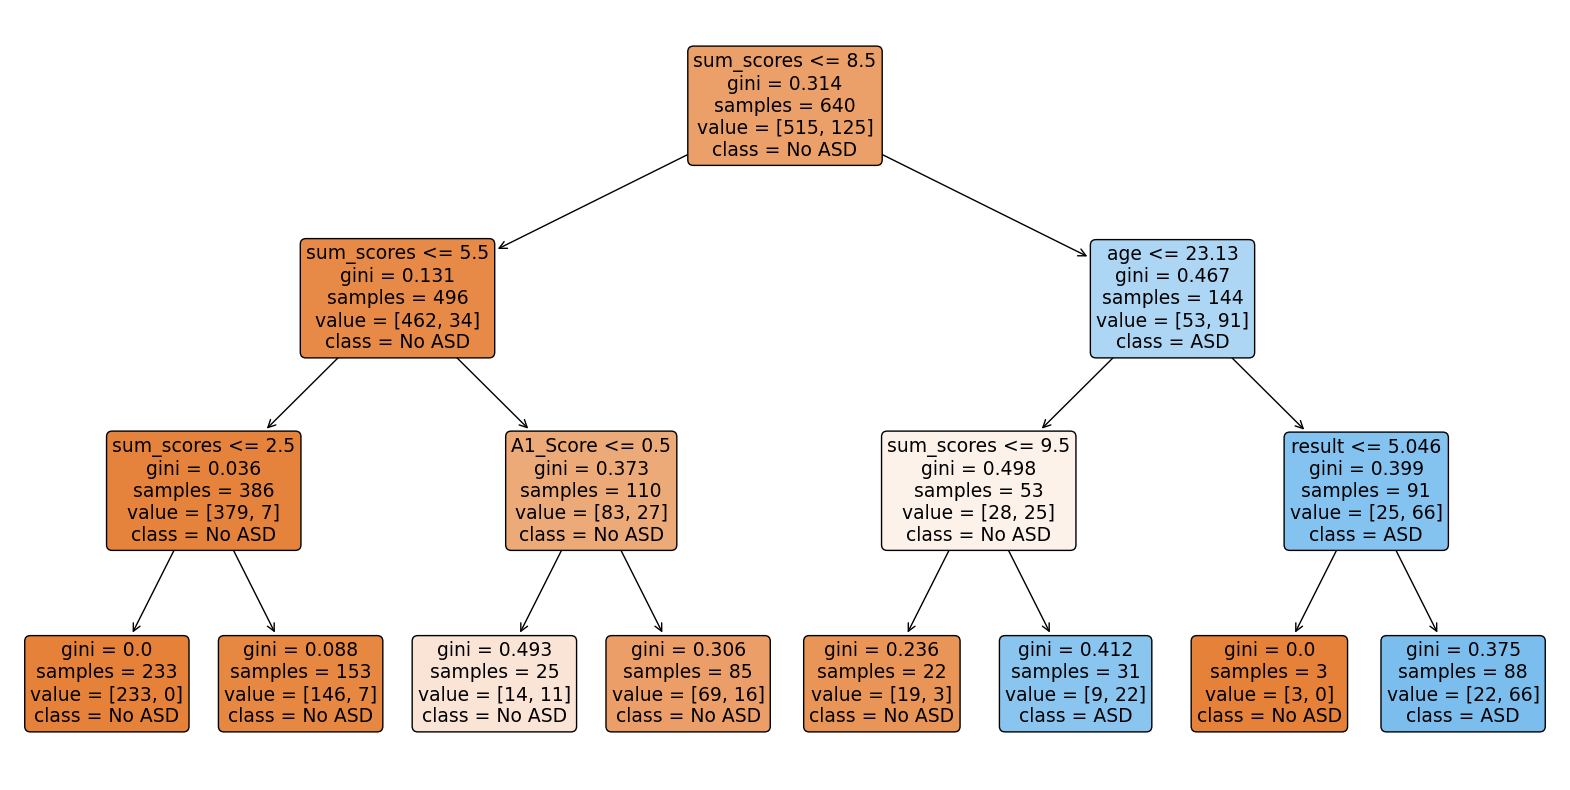

In [8]:
# Train the surrogate Decision Tree on the same training data but using XGB's class predictions as the target
surrogate_model = DecisionTreeClassifier(max_depth=3)
surrogate_model.fit(X_train, xgb_model.predict(X_train.values))  # here we use class predictions

surrogate_test_predictions = surrogate_model.predict(X_test)

# Calculate the accuracy of the surrogate model on the test set
surrogate_accuracy = accuracy_score(y_test, surrogate_test_predictions)
print(surrogate_accuracy)


# Visualize the surrogate decision tree
plt.figure(figsize=(20,10))
plot_tree(surrogate_model, 
          feature_names=X.columns,  
          class_names=['No ASD', 'ASD'],
          filled=True,
          rounded=True)
plt.show()


# PDP

In [13]:
X.columns

'A1_Score'

['age']
['result']
['sum_scores']


<Figure size 2000x1000 with 0 Axes>

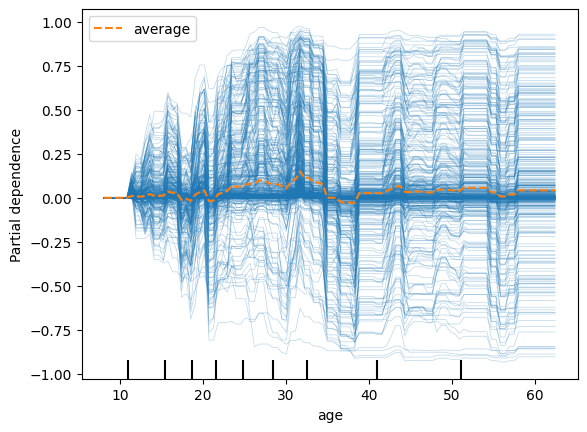

<Figure size 2000x1000 with 0 Axes>

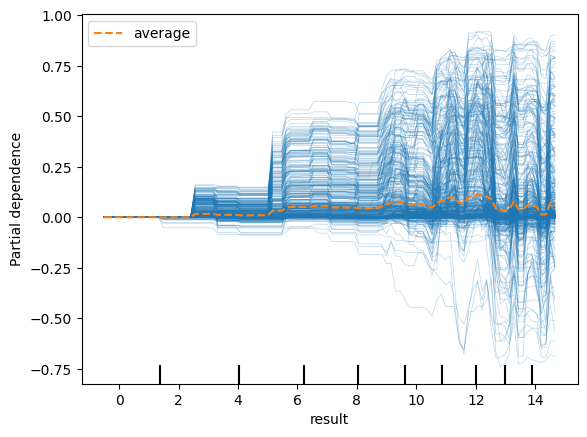

<Figure size 2000x1000 with 0 Axes>

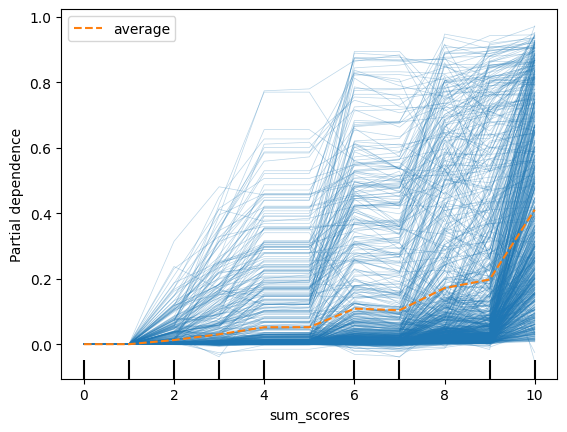

In [31]:
for x in ['age','result','sum_scores']:
    x=[x]
    print(x)
    plt.figure(figsize=(20, 10))

    
    PartialDependenceDisplay.from_estimator(xgb_model, X.values, feature_names=X.columns, features = x, kind="both", centered = "True")

### Why was there age in the model?
2-dimensional PDP between age and sums_scores (given the interaction of a decision tree)

<Figure size 1000x800 with 0 Axes>

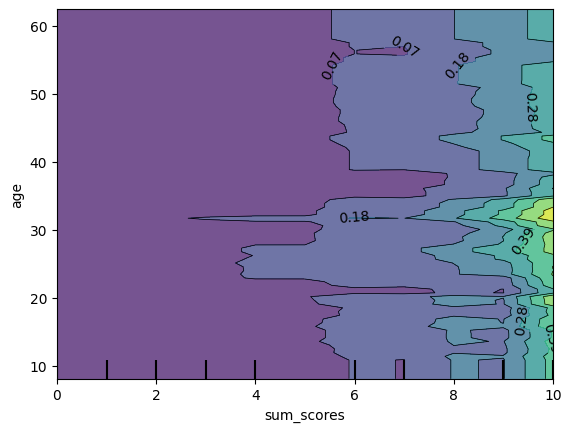

In [37]:
# Assuming X is your features DataFrame and xgb_model is your trained model
features_to_plot = [('sum_scores','age')]  # Define features to plot as a list of tuples for interaction

# Set the size of the plot
plt.figure(figsize=(10, 8))  # You can adjust the size as needed

PartialDependenceDisplay.from_estimator(xgb_model, X.values, feature_names=X.columns, features = features_to_plot, kind="average", centered = "True")


# ALE

In [10]:
X_train.values

array([[ 1.,  1.,  1., ...,  0.,  1., 10.],
       [ 0.,  0.,  0., ...,  0.,  1.,  2.],
       [ 1.,  0.,  0., ...,  0.,  1.,  1.],
       ...,
       [ 1.,  0.,  0., ...,  0.,  1.,  4.],
       [ 1.,  1.,  1., ...,  0.,  0.,  8.],
       [ 0.,  0.,  0., ...,  0.,  1.,  2.]])

c:\Users\zofsm\.conda\envs\interpretability\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\zofsm\.conda\envs\interpretability\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\zofsm\.conda\envs\interpretability\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\zofsm\.conda\envs\interpretability\lib\site-packages\xgboost\data.py:262: FutureWarning:

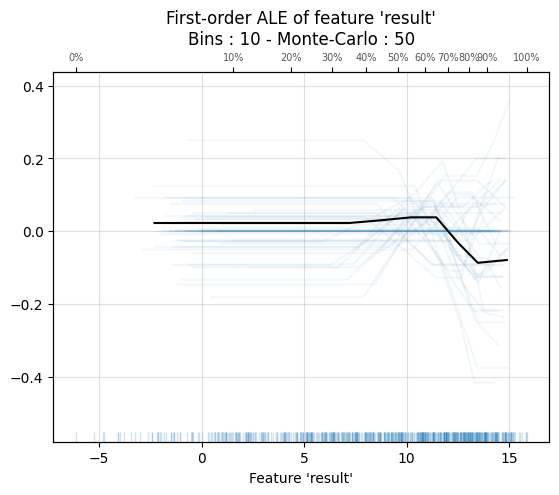

c:\Users\zofsm\.conda\envs\interpretability\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\zofsm\.conda\envs\interpretability\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\zofsm\.conda\envs\interpretability\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\zofsm\.conda\envs\interpretability\lib\site-packages\xgboost\data.py:262: FutureWarning:

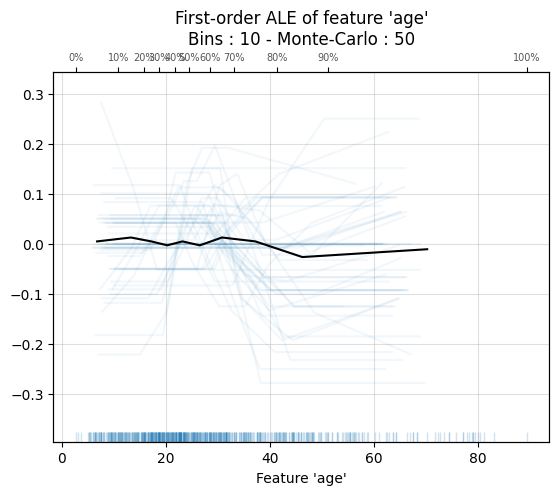

c:\Users\zofsm\.conda\envs\interpretability\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\zofsm\.conda\envs\interpretability\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\zofsm\.conda\envs\interpretability\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\zofsm\.conda\envs\interpretability\lib\site-packages\xgboost\data.py:262: FutureWarning:

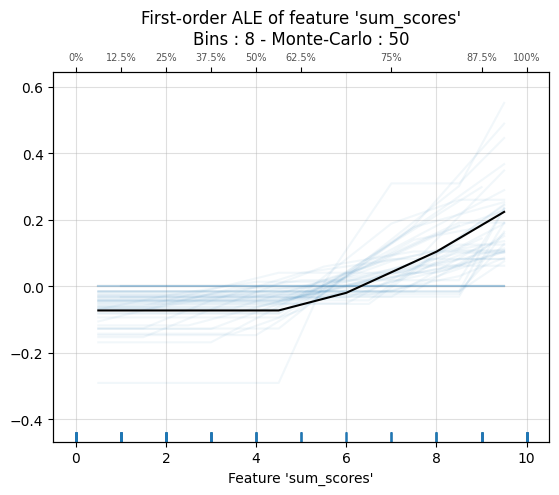

<Axes: title={'center': "First-order ALE of feature 'sum_scores'\nBins : 8 - Monte-Carlo : 50"}, xlabel="Feature 'sum_scores'">

In [20]:
ale_plot(xgb_model, X_train, 'result', monte_carlo=True)
ale_plot(xgb_model, X_train, 'age', monte_carlo=True)
ale_plot(xgb_model, X_train, 'sum_scores', monte_carlo=True)


### Why was there age in the model?
2-dimensional ALE between age and sums_scores (given the interaction of a decision tree)

c:\Users\zofsm\.conda\envs\interpretability\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\zofsm\.conda\envs\interpretability\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\zofsm\.conda\envs\interpretability\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\zofsm\.conda\envs\interpretability\lib\site-packages\xgboost\data.py:262: FutureWarning:

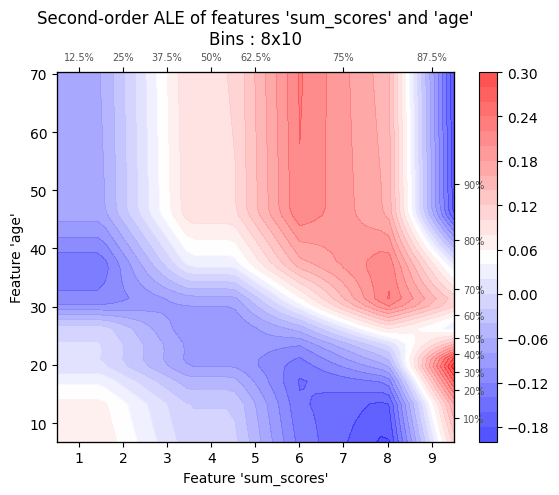

<Axes: title={'center': "Second-order ALE of features 'sum_scores' and 'age'\nBins : 8x10"}, xlabel="Feature 'sum_scores'", ylabel="Feature 'age'">

In [32]:
ale_plot(xgb_model, X_train, ['sum_scores','age'], monte_carlo=True)
